In [21]:
import numpy as np
import astropy
from itertools import izip
from pearce.emulator import OriginalRecipe, ExtraCrispy

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [23]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_z_sham_free_split/'
experts, overlap = 10, 2
fixed_params = {'z':0.0}

In [24]:
emu = OriginalRecipe(training_dir, fixed_params=fixed_params)
#emu = ExtraCrispy(training_dir, experts, overlap, fixed_params = fixed_params)

In [25]:
names = ['mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1',\
        'mean_occupation_centrals_assembias_split1','mean_occupation_satellites_assembias_split1']

In [31]:
#mock_wp = cat.calc_wp(rp_bins, RSD= False)
MAP = np.array([ 1.0, 0.0,0.5,0.5])


params = dict(zip(names, MAP))
#print params.keys()

emu_wps = []
#mock_nds = []
split = np.linspace(0.1, 0.9, 8)

#cat.model._input_model_dictionary['centrals_occupation']._split_abscissa = split_abcissa
#cat.model._input_model_dictionary['satellites_occupation']._split_abscissa = split_abcissa
for p in split:
    params['mean_occupation_centrals_assembias_split1'] = p
    params['mean_occupation_satellites_assembias_split1'] = p
    #print params.keys()
    #print cat.model.param_dict
    emu_wps.append(emu.emulate_wrt_r(params, emu.scale_bin_centers)[0])
    
emu_wps = np.array(emu_wps)

In [32]:
params = dict(zip(names, [0.0,0.0,0.5,0.5]))   

print params
noab_wp = emu.emulate_wrt_r(params, emu.scale_bin_centers)[0]

{'mean_occupation_satellites_assembias_split1': 0.5, 'mean_occupation_satellites_assembias_param1': 0.0, 'mean_occupation_centrals_assembias_split1': 0.5, 'mean_occupation_centrals_assembias_param1': 0.0}


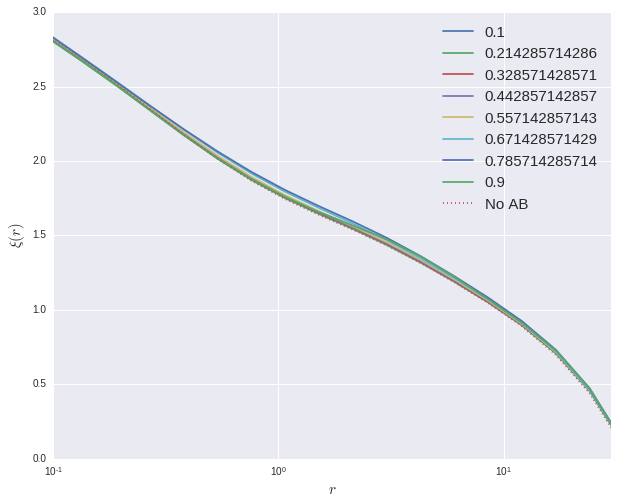

In [33]:
plt.figure(figsize=(10,8))
for p, emu_wp in zip(split, emu_wps):
    #print emu_wp
    plt.plot(emu.scale_bin_centers, emu_wp, label = p)
    
#plt.plot(bin_centers, sham_wp, ls='--', label = 'SHAM')
plt.plot(emu.scale_bin_centers, noab_wp, ls=':', label = 'No AB')


#plt.loglog()
plt.xscale('log')
plt.legend(loc='best',fontsize = 15)
plt.xlim([1e-1, 30e0]);
#plt.ylim([1,15000])
plt.xlabel(r'$r$',fontsize = 15)
plt.ylabel(r'$\xi(r)$',fontsize = 15)
plt.show()

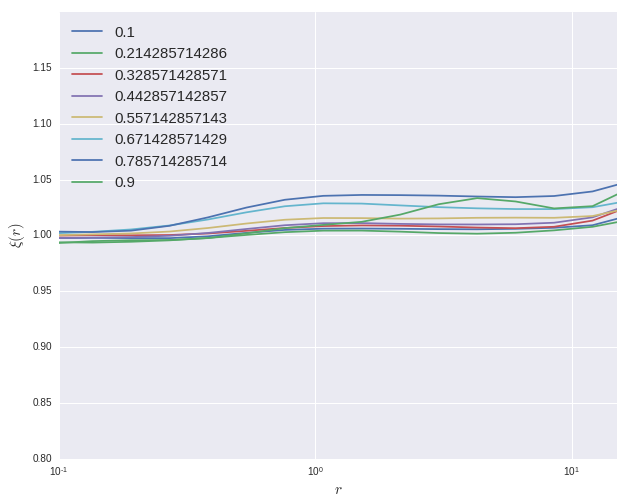

In [34]:
plt.figure(figsize=(10,8))
for p, emu_wp in zip(split, emu_wps):
    plt.plot(emu.scale_bin_centers, emu_wp/noab_wp, label = p)
    
#plt.plot(bin_centers, sham_wp, ls='--', label = 'SHAM')
#plt.plot(bin_centers, noab_wp, ls=':', label = 'No AB')


#plt.loglog()
plt.xscale('log')
plt.legend(loc='best',fontsize = 15)
plt.xlim([1e-1, 15e0]);
plt.ylim([0.8, 1.2])
plt.xlabel(r'$r$',fontsize = 15)
plt.ylabel(r'$\xi(r)$',fontsize = 15)
plt.show()

In [24]:
import scipy.optimize as op
from itertools import izip

In [25]:
def nll(p):
    # Update the kernel parameters and compute the likelihood.
    # params are log(a) and log(m)
    #ll = 0
    #for emulator, _y in izip(self._emulators, self.y):
    #    emulator.kernel[:] = p
    #    ll += emulator.lnlikelihood(_y, quiet=True)
    emu._emulator.kernel[:] = p
    print p
    ll= emu._emulator.lnlikelihood(emu.y, quiet=False)

    # The scipy optimizer doesn't play well with infinities.
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    # Update the kernel parameters and compute the likelihood.
    #gll = 0
    #for emulator, _y in izip(self._emulators, self.y):
    #    emulator.kernel[:] = p
    #    gll += emulator.grad_lnlikelihood(_y, quiet=True)
    emu._emulator.kernel[:] = p
    gll = emu._emulator.grad_lnlikelihood(emu.y, quiet=True)
    return -gll

In [26]:
emu.goodness_of_fit(training_dir)

array([ 0.99992995,  0.99986322,  0.99986264,  0.999844  ,  0.9997624 ,
        0.99958338,  0.99930644,  0.99944203,  0.99883149,  0.99572952,
        0.97476404,  0.97082905,  0.87971156,  0.94471602,  0.92468451,
       -0.19442956, -0.37925496,  0.92957744])

In [27]:
p0 = emu._emulator.kernel.vector

In [28]:
p0 = np.log(np.random.rand(emu._emulator.kernel.vector.shape[0]))
results = op.minimize(nll, p0, jac=grad_nll)

[-3.51877894 -1.031018   -0.03814318 -1.12453113 -5.67319569 -1.57654881]
[-2.54866192 -1.20465382 -0.24510811 -1.15897529 -5.73876184 -1.59899366]
[-0.73571178 -0.2929829   0.7663019   0.15657296 -3.17872519  0.75055019]
[-2.29441917 -1.0768038  -0.10327098 -0.97448671 -5.3797499  -1.26950061]
[-1.90578933 -0.94877488  0.18587524 -0.16692819 -3.96293447 -2.32630763]
[-2.25483709 -1.06376401 -0.07382134 -0.8922366  -5.23544677 -1.37713676]
[-2.30632749 -1.37161234 -0.28350743 -0.6856578  -4.96381384 -1.38446668]
[-2.51228908 -2.60300567 -1.12225178  0.14065741 -3.8772821  -1.41378638]
[ -2.84046891 -11.12014018   1.86926408   1.23468974  -0.49898834
  -1.4966161 ]
[-2.54980728 -3.57670217 -0.78025548  0.26572946 -3.49106855 -1.42325565]
[-2.58773319 -3.76557123 -1.04251328 -1.02861603 -2.51160925 -1.42351584]
[-2.56347872 -3.64478525 -0.87479356 -0.20085318 -3.13799535 -1.42334944]
[-2.55707573 -3.64188036 -0.87851208 -0.1829293  -3.13818215 -1.42116457]
[-2.53146375 -3.63026079 -0.893

In [30]:
results.x

array([ 0.96674242, -5.0154665 , -0.60071879,  4.8176645 ,  4.72162288,
       -1.05949933])

In [31]:
p0

array([-3.51877894, -1.031018  , -0.03814318, -1.12453113, -5.67319569,
       -1.57654881])

In [32]:
emu._emulator.kernel[:] = results.x
emu._emulator.recompute()

True

In [34]:
print results.x
print emu.get_param_names()

[ 0.96674242 -5.0154665  -0.60071879  4.8176645   4.72162288 -1.05949933]
['mean_occupation_satellites_assembias_split1', 'mean_occupation_satellites_assembias_param1', 'mean_occupation_centrals_assembias_split1', 'mean_occupation_centrals_assembias_param1', 'r']


In [38]:
emu._emulator.kernel.pars

array([  2.62936512e+00,   6.63453628e-03,   5.48417300e-01,
         1.23675908e+02,   1.12350437e+02,   3.46629315e-01])